# 1 Prophet

# Dependencies

In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
!pip install pystan==2.19.1.1

In [3]:
!pip install pandas fbprophet

In [4]:
import pandas as pd
from fbprophet import Prophet

# Processing Dataset

In [5]:
df = pd.read_csv('G:/My Drive/NYCU/Research/Noise_Forecasting/Prophet/Noise_DateStamp.csv')

In [6]:
#df.head()
#df.describe()
#print (df['ID'].unique())
df.dtypes

ID              object
DateStamp       object
Hourly_Mean    float64
dtype: object

In [7]:
df['Year'] = df['DateStamp'].apply(lambda x: str(x)[-8:-6])
df['Month'] = df['DateStamp'].apply(lambda x: str(x)[-13:-11])
df['Day'] = df['DateStamp'].apply(lambda x: str(x)[-16:-14])
df['ds'] = pd.DatetimeIndex(df['Day']+'-'+df['Month']+'-'+df['Year'])

#df.dtypes
df.head()

,ID,DateStamp,Hourly_Mean,Year,Month,Day,ds
0,A01,29-11-2021 00:00,63.561928,21,11,29,2021-11-29
1,A01,29-11-2021 01:00,61.952215,21,11,29,2021-11-29
2,A01,29-11-2021 02:00,61.190951,21,11,29,2021-11-29
3,A01,29-11-2021 03:00,59.555024,21,11,29,2021-11-29
4,A01,29-11-2021 04:00,59.309026,21,11,29,2021-11-29


In [8]:
#df = df.loc[(df['ID']==A01)
df.drop(['ID', 'DateStamp', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']
df.head()

,y,ds
0,63.561928,2021-11-29
1,61.952215,2021-11-29
2,61.190951,2021-11-29
3,59.555024,2021-11-29
4,59.309026,2021-11-29


# Model Training

In [10]:
m = Prophet(interval_width=0.95)
model = m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecasting

In [26]:
future = m.make_future_dataframe(periods=100,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-12,67.367885,61.960895,73.170969,67.367885,67.367885,0.330680,0.330680,0.330680,0.330680,0.330680,0.330680,0.0,0.0,0.0,67.698565
1,2021-02-12,67.273538,60.809389,72.730936,67.273538,67.273538,-0.538776,-0.538776,-0.538776,-0.538776,-0.538776,-0.538776,0.0,0.0,0.0,66.734762
2,2021-03-12,67.188321,61.106251,72.346486,67.188321,67.188321,-0.538776,-0.538776,-0.538776,-0.538776,-0.538776,-0.538776,0.0,0.0,0.0,66.649546
3,2021-04-12,67.093975,61.165755,72.487322,67.093975,67.093975,-0.337056,-0.337056,-0.337056,-0.337056,-0.337056,-0.337056,0.0,0.0,0.0,66.756919
4,2021-05-12,67.064460,60.176550,71.802601,67.064460,67.064460,-1.182810,-1.182810,-1.182810,-1.182810,-1.182810,-1.182810,0.0,0.0,0.0,65.881650


In [27]:
#forecast.tail()
forecast[['ds','yhat']]

,ds,yhat
0,2021-01-12,67.698565
1,2021-02-12,66.734762
2,2021-03-12,66.649546
3,2021-04-12,66.756919
4,2021-05-12,65.881650
...,...,...
102,2029-11-30,63.452297
103,2029-12-31,63.623519
104,2030-01-31,64.506064
105,2030-02-28,64.478518


# Plot

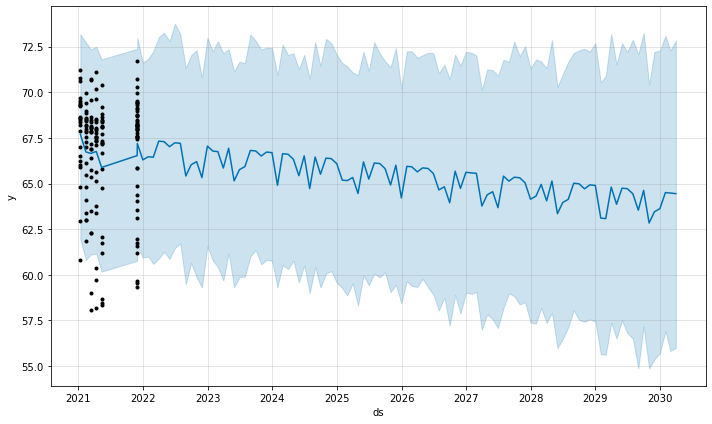

In [28]:
plot1 = m.plot(forecast)

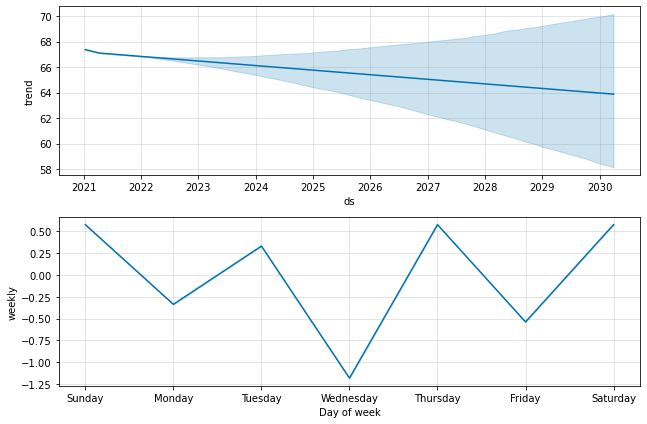

In [29]:
plt2 = m.plot_components(forecast)